This classification problem is difficult. The number of labels, and the lack of strong correlation between features makes classification complicated. I tried Gaussian Naive Bayes classification and KMeans clustering algorithms. The GaussianNB algorithm was generally more precise than the KMeans, however the precision only peaked around 0.2. Further hyperparameter tweaking and feature weighting would be needed to refine the models. I will be trying different classification models as well.

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Create a data frame with the beer recipe data
df = pd.read_csv('recipeData.csv', index_col=0, encoding='latin1')

# Find the number of null values in each column
print('Number of nulls in each column\n')
df_nulls = df.copy().isnull().sum()
df_nulls = df_nulls.sort_values(ascending=False)
print(df_nulls)

Number of nulls in each column

PrimingAmount    69087
PrimingMethod    67095
PitchRate        39252
MashThickness    29864
PrimaryTemp      22662
BoilGravity       2990
Style              596
Name                 1
Efficiency           0
BoilTime             0
SugarScale           0
Color                0
IBU                  0
ABV                  0
FG                   0
OG                   0
Size(L)              0
StyleID              0
BrewMethod           0
URL                  0
BoilSize             0
dtype: int64


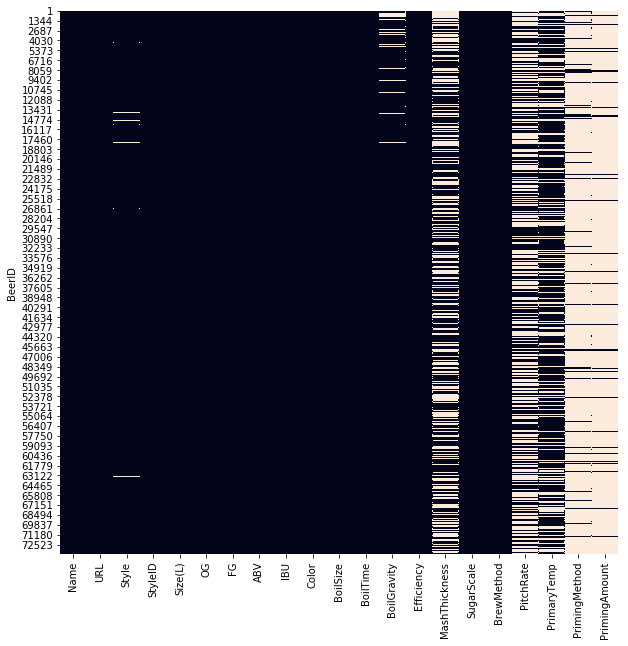

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.isnull(), cbar=False, ax=ax)
plt.show()

There doesn't appear to be any correlations between null values between features. Since there are some missing 'Style' values, I'll use 'Style ID' to identify the types of beers. 
Now look for correlations between features.

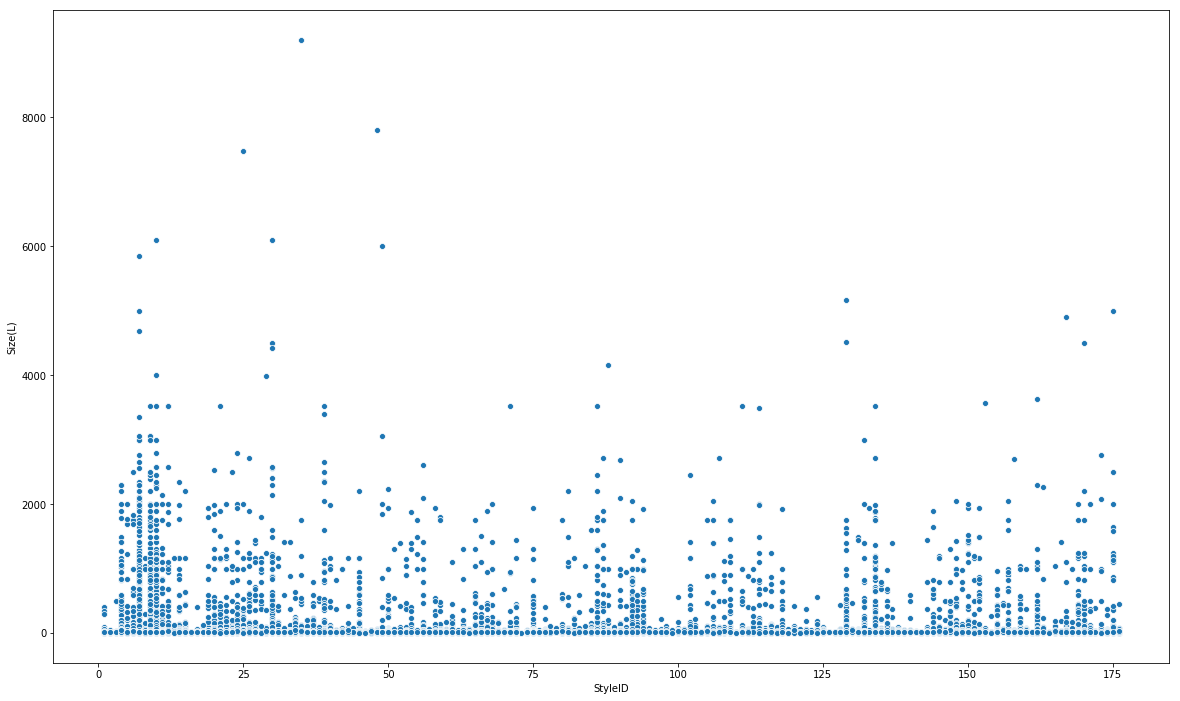

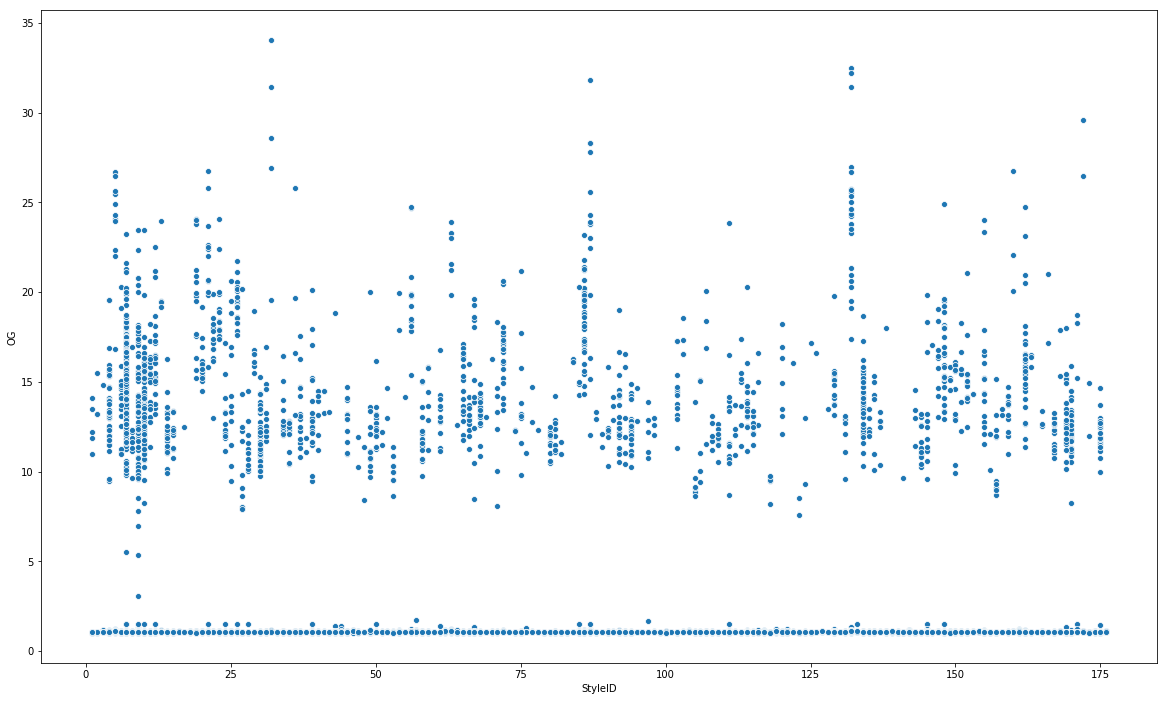

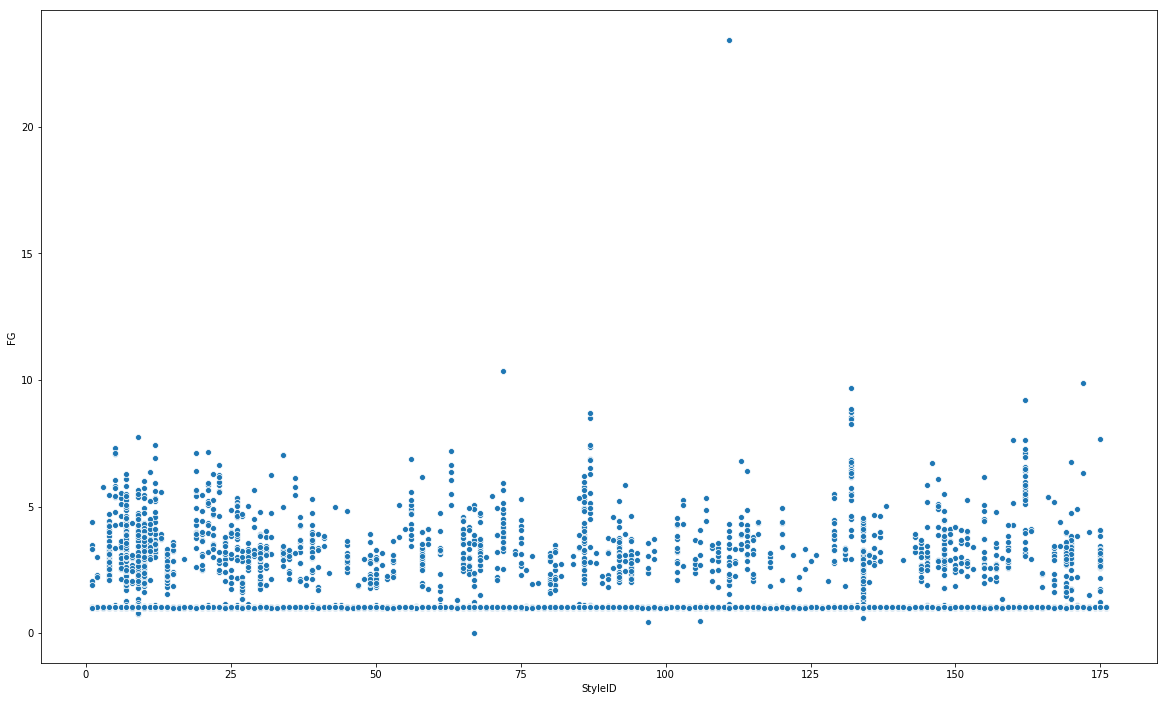

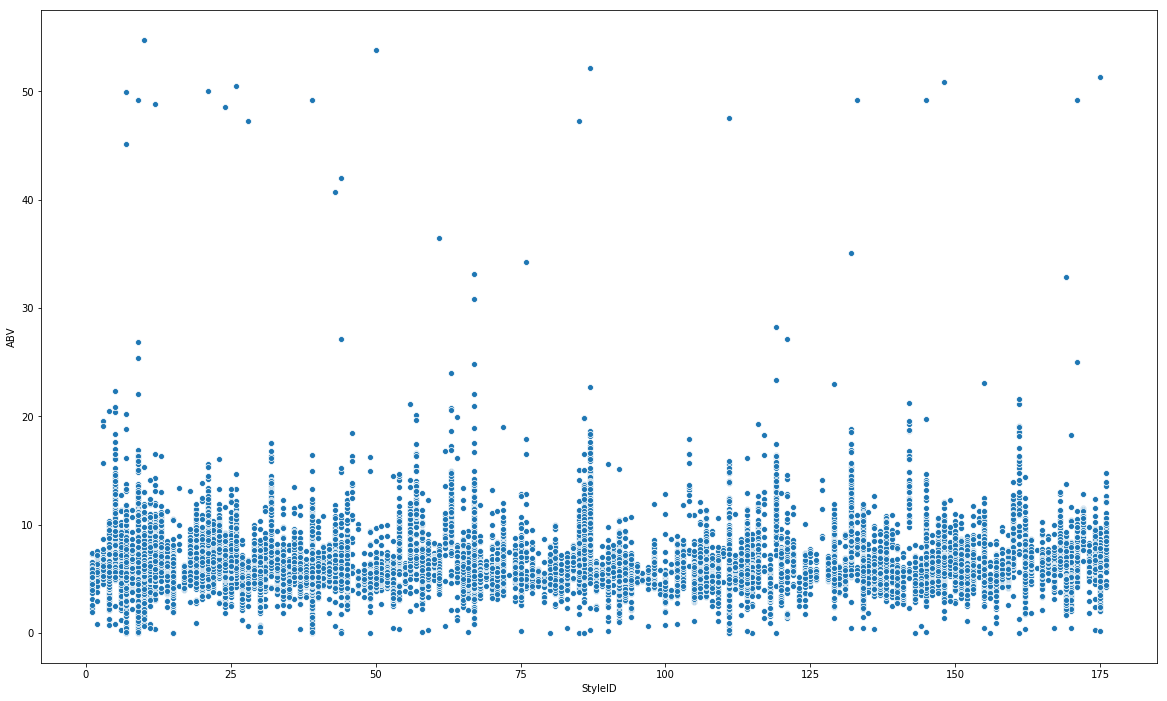

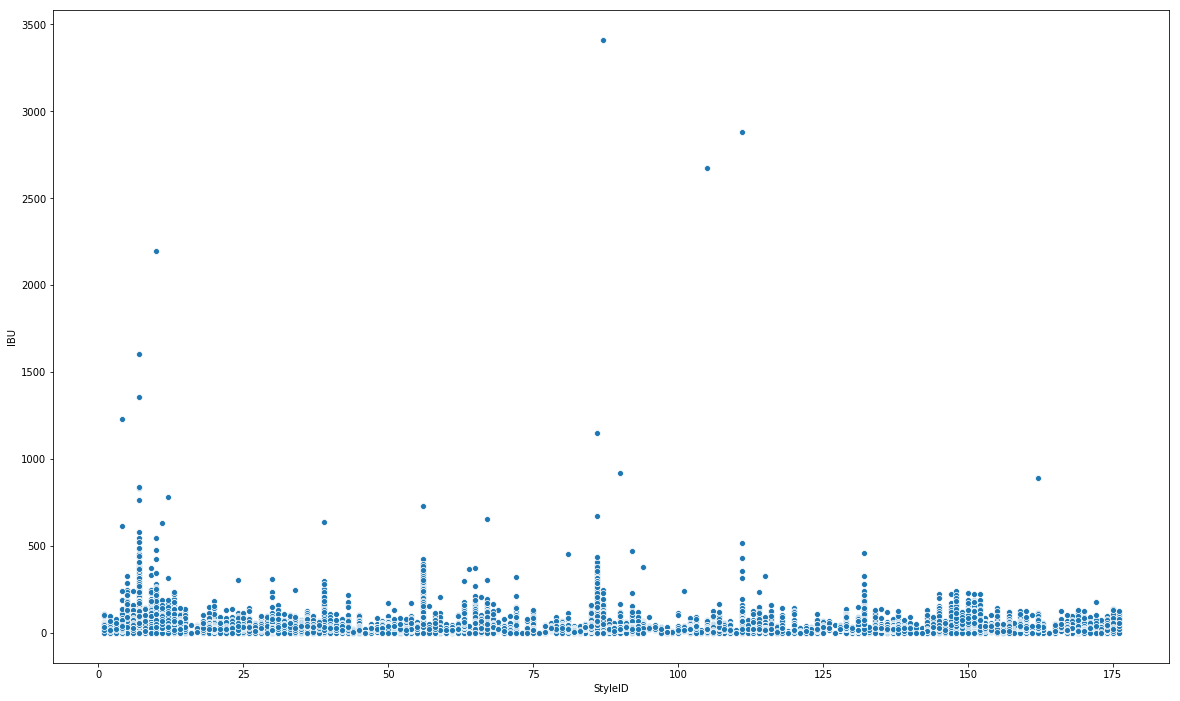

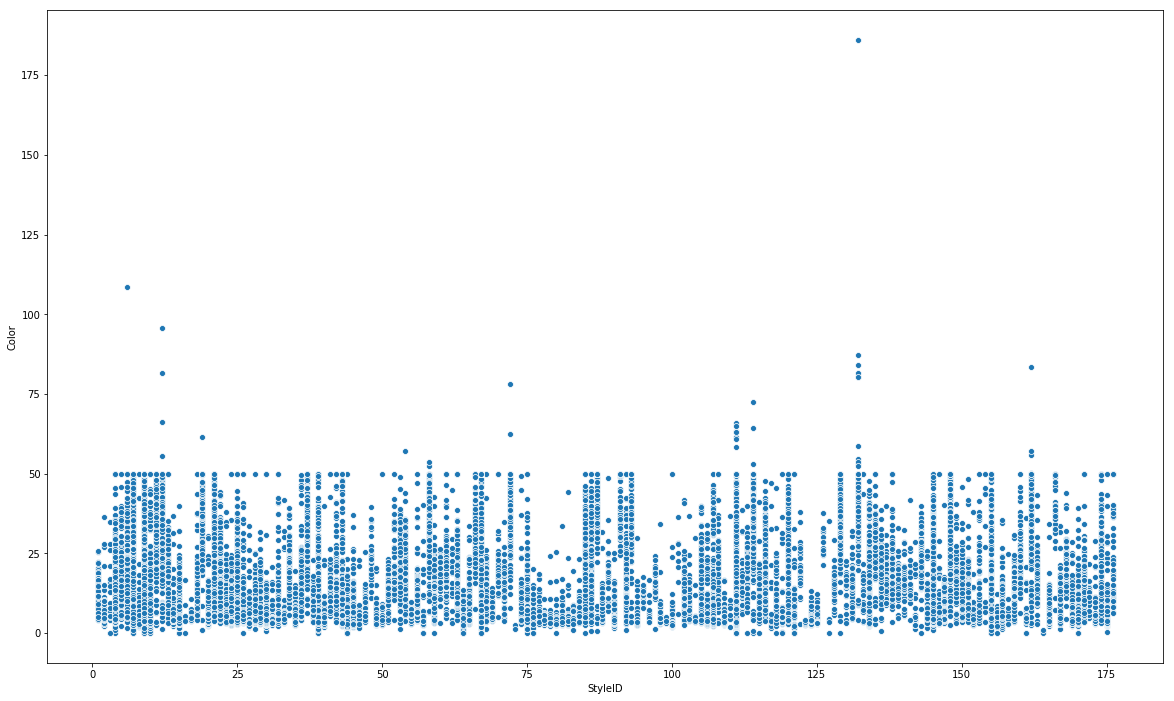

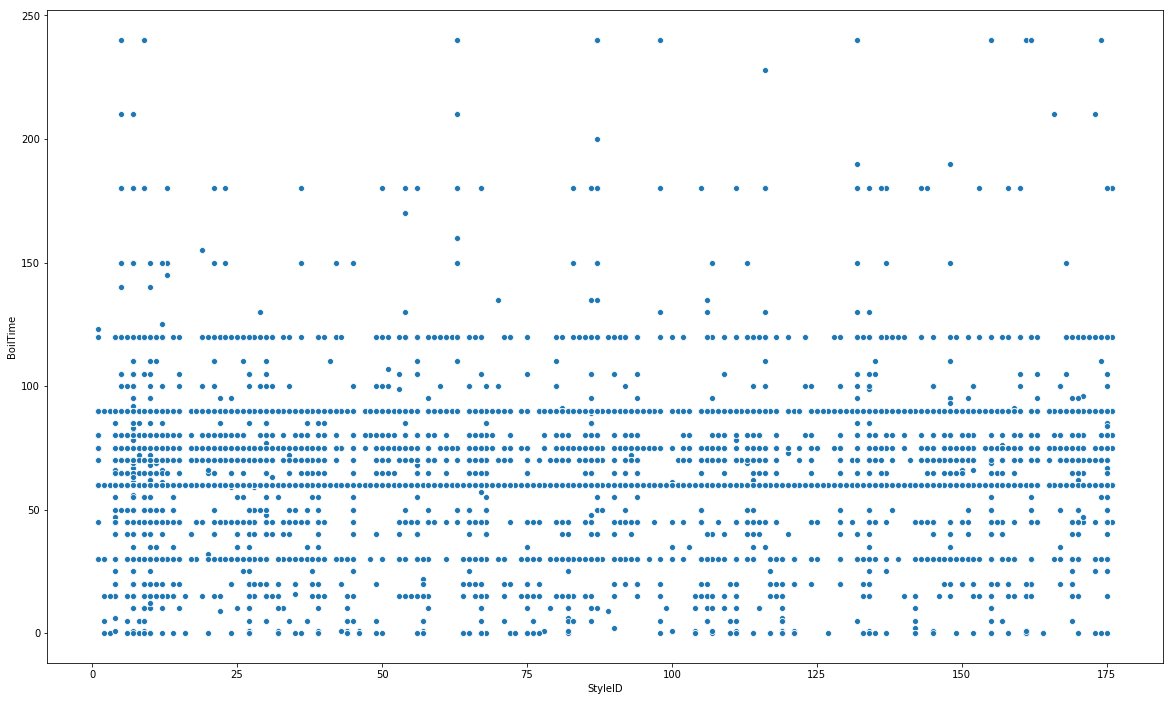

In [4]:
plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df['StyleID'], y=df['Size(L)'])

plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df['StyleID'], y=df['OG'])

plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df['StyleID'], y=df['FG'])

plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df['StyleID'], y=df['ABV'])

plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df['StyleID'], y=df['IBU'])

plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df['StyleID'], y=df['Color'])

plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df['StyleID'], y=df['BoilTime'])

In [5]:
# Choose data set and target set
X = df[['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime']]
y = df['StyleID']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Use the KMeans model
kmeans = KMeans(n_clusters=176)
kmeans.fit(X_train, y_train)

# Get prediction from training data vs test data
prediction = kmeans.predict(X_test)

# Print classification results
print('KMeans precision:', round(precision_score(y_test, prediction, average='weighted'), 2))


# Use the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get prediction from training data vs test data
prediction = gnb.predict(X_test)

# Print classification results
print('Gaussian Naive Bayes precision:', round(precision_score(y_test, prediction, average='weighted'), 2))

C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KMeans precision: 0.11
Gaussian Naive Bayes precision: 0.14


C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
